# Laplace Transform

The Laplace transform is used to transform a piecewise-continuous function $f : \left[0, \infty \right)$ from the time domain $ t \in \left[0, \infty \right)$ to the frequency domain with
$$
F(s) = \mathcal{L} \{f\}(s) = \int\limits_{0}^{\infty} f(t) ~ e^{-s ~ t} dt \text{.}
$$

The Laplace transform works similar to the Fourier transform but with an other basis and time range. The Laplace transform has a time range of  $\left[0, \infty \right)$ because only [causal systems](https://en.wikipedia.org/wiki/Causal_system) are analyzed and the basis $e^{-s ~ t}$ contains a real and an imaginary part with

$$
s = \sigma \pm j \omega \text{.}
$$

### Example
The function $ f(t) = e^{a~t} $ with a constant parameter $ a \in \mathbb{R} $ and time $ t \in \left[0, \infty \right) $ is transformed to
$$
F(s) = \mathcal{L} \{ e^{a~t} \}(s) = \int\limits_{0}^{\infty} e^{a ~ t} ~ e^{-s ~ t} dt = \int\limits_{0}^{\infty}  e^{(a -s) ~ t} dt \\
= \left[ \frac{ e^{(a - s)t}}{a - s} \right]_{t=0}^{t=\infty} = \frac{1}{s- a} \text{.}
$$

In a subsequent section about the stability of dynamical systems will be discussed, that, if  $ f(t) $ is the solution of a differential equation and $ a < 0 $, than the system is called stable. 



### Properties

The Laplace transform has the useful mathematical property of **Linearity**: Consider two functions $f(t)$ and $g(t)$ and a parameter $\alpha$, then the equation

$$
\mathcal{L} \{ g(t) + \alpha f(t) \}(s) = \mathcal{L} \{ g(t) \}(s) + \alpha ~ \mathcal{L} \{ f(t) \}(s)
$$

holds.
Every **linear** time-invariant ordinary or partial differential can be transformed to the frequency domain using the [Properties](https://en.wikipedia.org/wiki/Laplace_transform#Properties_and_theorems) and [Laplace Table](https://en.wikipedia.org/wiki/List_of_Laplace_transforms#Table).

The Laplace transform from an "analytical" differential equation to an algebraic equation is used to analyze the system dynamics and to design the controller with simple mathematical methods. However, these methods are limited to (piecewise-) linear functions and differential equations. Therefore, the representation of differential equations with matrix-vector multiplication (state-space model) or with a non-linear right-hand side are very common in modern Control Engineering. 


## Example: First Order ODE

Consider a linear ordinary differential equation 

$$
\dot{x}(t) + x(t) = f(t) 
$$ 

with the initial value $ x(0) = x_{0} $ and the arbitrary continuous function $ f(t) $ on the right-hand side. The Laplace transform is applied on both sides of the ODE to yield

$$
s X(s) - x_{0} + X(s) = F(s) \text{.}
$$

The first derivative $ \dot{x}(t) $ is transformed to $ \left[s X(s) - x_{0}\right] $ and the remaining terms are replaced by their Laplace expression.

The transformed ODE can be formed to 

$$
X(s) [s + 1] = F(s) + x_{0}
$$

and further to

$$
    X(s) = \frac{F(s) + x_{0}}{s + 1} \text{.}
$$

Now, the ODE can be solved by applying the inverse Laplace transform 
$$
 x(t) = \mathcal{L}^{-1} \{X(s)\}(t) ~=~ \mathcal{L}^{-1} \left\{\frac{F(s) + x_{0}}{s + 1}\right\}(t) \text{.}
$$

In the sense of Control Engineering the initial value $x_{0}$ is often equal to zero because the system is assumed to start from its idle mode. Furthermore, the right-hand side function $f(t)$ or $F(s)$ is usually the controller input - named as $u(t)$ in the time or $U(s)$ in the frequency domain.

To complete the inverse Laplace transform, the values $F(s) = 2$ and $ x_{0} = 2$ are assumed and one gains 

$$
 x(t) ~=~ \mathcal{L}^{-1} \left\{\frac{4}{s + 1}\right\}(t) ~=~ 4 ~ \mathcal{L}^{-1} \left\{\frac{1}{s + 1}\right\}(t) ~=~ 4 ~ e^{-t} ~ \sigma(t) 
$$

with $ \sigma(t) $ as the step or [Heaviside function](https://en.wikipedia.org/wiki/Heaviside_step_function)

$$
\sigma(t) = 
\begin{cases}
1 ~ \text{for} ~ t \geq 0 \text{,} \\
0 ~ \text{else.}
\end{cases}
$$

### Simulation

The example above is simulated with $F(s) = 2$ and $x_{0} = 2$. Firstly, the algebraic equation of $X(s)$ is built.

In [7]:
using ControlSystems
F = 2;  # Right-hand side function
x₀ = 2; # Initial value
X = tf(F + x₀, [1, 1]) # Laplace transform of ODE

TransferFunction{ControlSystems.SisoRational{Int64}}
  4
-----
s + 1

Continuous-time transfer function model

Secondly, the solution of $x(t)$ is computed and plotted with the final time $T = 5$ seconds.

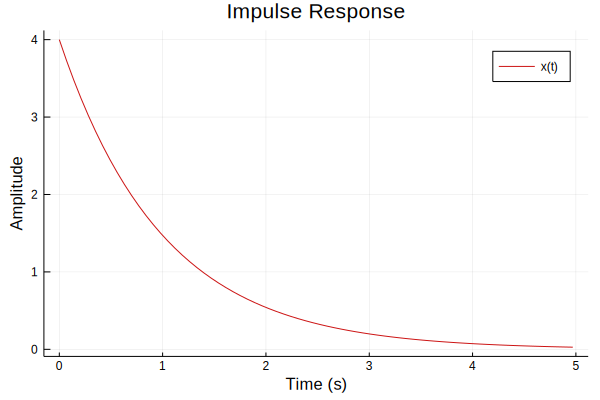

In [8]:
Tf = 5; # Final time
impulseplot(X, Tf, label="x(t)") # Solution in the time domain

#### Remark: Nice to know
The software toolboxes usually does not use the inverse Laplace transform to find the solution for $x(t)$ in the time domain. Instead, they transform the algebraic equation to a matrix-vector multiplication (state-space model) like in the previous sections as

$$
\dot{x}(t) = A ~ x(t) + B ~ u(t)
$$

and solve this with a numerical integrator, e.g. Runge-Kutta solver.

## Example: Second Order ODE

Next, the second order ordinary differential equation 

$$
\ddot{x}(t) + a ~ \dot{x}(t) + b x(t) = u(t) 
$$ 

with the initial values $x(0) = x_{0,1}$, $ \dot{x}(0) = x_{0,2}$, parameters $ a \in \mathbb{R} $, $ b \in \mathbb{R} $ and input $ u \in \mathcal{PC}(\mathbb{R},\mathbb{R}) $ (piecewise-continuous function) is Laplace transformed to

$$
s^2 X(s) - s ~x(0) - \dot{x}(0) + a ~ s X(s) - a ~ x_{0} + b ~ X(s) = U(s) \text{.}
$$

This equation is used to derive the [Transfer Function](https://en.wikipedia.org/wiki/Transfer_function) $G(s)$. Firstly, the Laplace transformed equation is rewritten as

$$
X(s) \left[ s^2 + a~ s + b \right] = U(s) + (s + a) ~ x_{0,1} + x_{0,2}
$$

and further to

$$
X(s) = \frac{U(s) + (s + a) ~ x_{0,1} + x_{0,2}}{s^2 + a~ s + b}  \text{.}
$$

As mentioned in the first example above, it is assumed that the initial values are zero: $x_{0,1} = x_{0,2} = 0$ and thus one yields the transfer function

$$
G(s) ~=~ \frac{X(s)}{U(s)} = \frac{1}{s^2 + a~ s + b}  \text{.}
$$

The roots of numerator are called **zeros** and the roots of the denominator are called **poles** of the transfer function. The poles are important to analyze the stability of a system.

Here, the transfer function has no zeros and two poles that are calculated with

$$
s^2 + a~s + b = 0
$$

and

$$
s_{1,2} = \frac{-a}{2} \pm \frac{1}{2} \sqrt{a^2 - 4~b} \text{.}
$$


### Simulation

The parameters are chosen as $a = 2$ and $b = 10$ and the transfer function $G(s)$ is created. 

In [4]:
a = 2; # Parameters
b = 10;
G = tf(1, [1, a, b]) # Transfer function

TransferFunction{ControlSystems.SisoRational{Int64}}
      1
--------------
s^2 + 2*s + 10

Continuous-time transfer function model

The conjugated-complex poles of $G(s)$ are calculated with

$$
s_{1,2} = -1.0 \pm 3.0j \text{.}
$$

and the numerically computed poles are given below.

In [5]:
pole(G)

2-element Array{Complex{Float64},1}:
 -0.9999999999999998 + 3.0im
 -0.9999999999999998 - 3.0im

Finally, the input is assumed to be the step function $u(t) = \sigma(t)$ which corresponds to $U(s) = \frac{1}{s}$. The step response is the solution of $x(t)$ with a step function as input. Due to the complex part of the poles, one yields an oscillating behaviour.

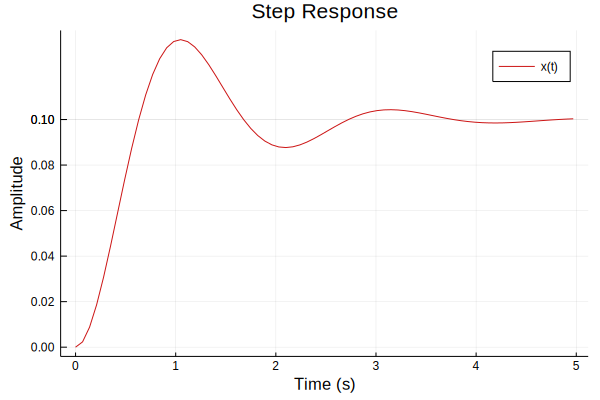

In [6]:
Tf = 5 # Final time
stepplot(G, Tf, label="x(t)") 